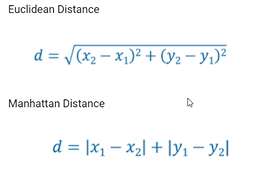

importing dependencies

In [84]:
import numpy as np
import statistics

Building KNN Classifier

In [85]:
class KNN_Classifier():

  # initiating parameters
  def __init__(self, distance_metric):
    self.distance_metric = distance_metric




  # getting the distance metric
  def get_distance_metrics(self, training_data_point, testing_data_point):

    if(self.distance_metric == 'euclidean'):
      dist = 0

      for i in range (len (training_data_point)-1):
        dist = dist + (training_data_point[i] - testing_data_point[i]) **2

      euclidean_dist = np.sqrt(dist)
      return euclidean_dist

    elif(self.distance_metric == 'manhattan') :
      dist = 0
      for i in range (len (training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - testing_data_point[i])

      manhattan_dist = dist
      return manhattan_dist



  # getting the nearist neighbor
  def nearest_neighbor(self, X_train, test_data, k):

    distance_list = []

    # appending the training data and its distance from the testing data to the list
    for training_data in X_train:
      distance = self.get_distance_metrics(training_data, test_data)
      distance_list.append((training_data, distance))

    # sorting the training data based on the distance
    distance_list.sort(key=lambda x:x[1])

    neighbors_list = []

    # appending the k no.of training datas to the list after sorting
    for j in range (k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list



  # used to predict the class of the new data point
  def predict(self, X_train, test_data, k):
    neighbors = self.nearest_neighbor(X_train, test_data, k)

    for data in neighbors:
      label = []
      label.append(data[-1])

    # using mode to identify the class based on majority
    predicted_class = statistics.mode(label)
    return predicted_class


Diabetes Prediction

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Loading Dataset to Pandas Dataframe

In [87]:
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [88]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
diabetes_data.shape

(768, 9)

Seperating target & features

In [90]:
X = diabetes_data.drop(columns='Outcome', axis = 1)
Y = diabetes_data['Outcome']

In [91]:
# converting data to numpy array
X = X.to_numpy()
Y = Y.to_numpy()
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

Train Test & Split

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [93]:
print(X_train)
print(Y_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 3.24e+01 1.41e-01 2.40e+01]
 [6.00e+00 1.05e+02 7.00e+01 ... 3.08e+01 1.22e-01 3.70e+01]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.01e+01 3.98e-01 5.90e+01]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [4.00e+00 1.12e+02 7.80e+01 ... 3.94e+01 2.36e-01 3.80e+01]
 [0.00e+00 8.60e+01 6.80e+01 ... 3.58e+01 2.38e-01 2.50e+01]]
[1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0

In [94]:
# adding the target along with the features
X_train = np.insert(X_train,8,Y_train, axis=1)
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 1.41e-01 2.40e+01 1.00e+00]
 [6.00e+00 1.05e+02 7.00e+01 ... 1.22e-01 3.70e+01 0.00e+00]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.98e-01 5.90e+01 1.00e+00]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.00e-01 3.50e+01 0.00e+00]
 [4.00e+00 1.12e+02 7.80e+01 ... 2.36e-01 3.80e+01 0.00e+00]
 [0.00e+00 8.60e+01 6.80e+01 ... 2.38e-01 2.50e+01 0.00e+00]]


In [95]:
X_train.shape

(614, 9)

In [96]:
print(X_train[:,8])

[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.

X_train -> training data with features as well as the targets   
X_test -> test data without the targets

Model Training -> KNN

In [97]:
 classifier = KNN_Classifier(distance_metric='manhattan')

KNN can predict only one test point at a time

In [98]:
prediction = classifier.predict(X_train, X_test[0], k =5)

In [99]:
print(X_test[0])
print(Y_test[0])

[  3.    106.     72.      0.      0.     25.8     0.207  27.   ]
0


In [100]:
print(prediction)

0.0


Predicting the class for multiple data points at a time

In [101]:
X_test.shape

(154, 8)

In [102]:
X_test_size = X_test.shape[0]
print(X_test_size)

154


In [103]:
Y_predict = []

for i in range (X_test_size):
  prediction = classifier.predict(X_train, X_test[i], k = 5)
  Y_predict.append(prediction)

print(Y_predict)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.

In [104]:
Y_true = Y_test

Model Evaluation

In [105]:
accuracy = accuracy_score(Y_predict, Y_true)

In [106]:
print(accuracy)

0.7402597402597403
